<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/Ensemble%20Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods

## Agenda

<hr>

1. Introduction to Ensemble Methods

2. RandomForest

3. AdaBoost

4. GradientBoostingTree

5. VotingClassifier

<hr>

# Introdução aos Ensemble Method
* O objetivo é combinar as predições/estimativas com base em vários algoritmos ( Linear Regression, Decisison Tree, etc. ) para criar um efeito combinado.
* Há dois tipos de Ensemble Methods
  - Averaging Methods : Os estimadores são construídos independentemente e então se toma a média das estimativas.
    * Exemplo: Random RandomForest etc.
  - Boosting Methods: Estimadores são construídos sequencialmente usando a versão ponderada dos dados.
    * Exemplo: AdaBoost.
  
<img src="https://cdn-images-1.medium.com/max/1000/1*PaXJ8HCYE9r2MgiZ32TQ2A.png">

![EnsembleMethods](https://raw.githubusercontent.com/MathMachado/Python_RFB/master/Material/Ensemble.png?token=AGDJQ62OR73I6ZLN2GNSHGK5QG7PC)

# 2. RandomForest
* Recap - As limitações do Decison Tree é overfitting e apresenta alta variância.
* RandomForest é uma média dos Ensemble Methods cuja estimativa é função de k Decision's trees.

<img src="https://www.researchgate.net/profile/Stavros_Dimitriadis/publication/324517994/figure/fig1/AS:615965951799303@1523869135381/Classification-process-based-on-the-Random-Forest-algorithm-2.png">

### Algoritmo
* Dados consistem de N linhas e M features.
* Amostra aleatória do dataframe de treinameno é realizada;
* Amostra aleatória das features é realizada;

# Comparar Decision Tree & Random Forest
* Dataframe: MINIST

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
from sklearn.datasets import load_digits
Digits = load_digits()

In [0]:
X = Digits.data
y = Digits.target

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [0]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
dt.score(X_test,y_test)

0.8666666666666667

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [0]:
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.score(X_test,y_test)

0.9577777777777777

##### Parâmetros Importantes:
* n_estimators: número de árvores. Quanto maior --> Melhor, mas há o custo computacional.
* max_features: Número máximo de features a serem consideradas para divisão do nó. 
    * classificação: max_features= sqrt(n_features).
    * regressão: max_features= n_features.
    * n_jobs: Defina n_jobs= -1 para fazer uso de todos os cores.

### AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoostClassifier com max_depth= 8
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=600)
ab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [0]:
ab.score(X_test,y_test)

0.9888888888888889

In [0]:
# AdaBoostClassifier com n_estimator= 20
ab = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),n_estimators=600)
ab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=20,
                         

In [0]:
ab.score(X_test,y_test)

0.9711111111111111

### GradientBoostingTree


In [0]:
from sklearn.datasets import load_boston # Problema de Regressão
house_data = load_boston()
X = house_data.data
y = house_data.target

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
gbt = GradientBoostingRegressor()
gbt

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
gbt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
test_score = np.zeros(100, dtype=np.float64)
for i, y_pred in enumerate(gbt.staged_predict(X_test)):
    test_score[i] = gbt.loss_(y_test, y_pred)

Text(0,0.5,'Least squares Loss')

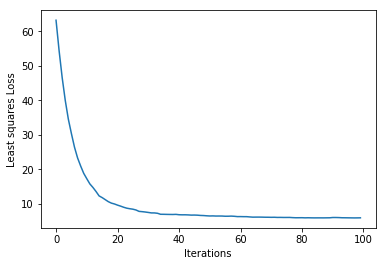

In [0]:
plt.plot(test_score)
plt.xlabel('Interações')
plt.ylabel('Least Squares Loss')

### VotingClassifier
* Objetivo: Combinar classificadores de aprendizado de máquina conceitualmente diferentes e usar um voto majoritário ou ponderado para prever os rótulos das classes.
* **Tipos de VotingClassifier**:
  - Soft Voting Classifier - pesos diferentes para estimadores diferentes;
  - Hard Voting Classifier - todos os estimadores tem mesmo peso.

##### Exemplo: Predizer dígitos usando VotingClassifier

In [0]:
import pandas as pd
import numpy as np

from sklearn.ensemble import VotingClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier, LogisticRegressionCV, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier # Multi-Layer Perceptron Classifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectKBest, chi2
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [0]:
estimators = [('KNeighborsClassifier', KNeighborsClassifier(3)),
               ('SVC', SVC(kernel="rbf", C= 10, probability=True)),
               ('NuSVC', NuSVC(probability=True)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('RandomForestClassifier', RandomForestClassifier()),
               ('GradientBoostingClassifier', GradientBoostingClassifier()),
               ('RidgeClassifier', RidgeClassifier()),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB()),
               ('PassiveAggressiveClassifier', PassiveAggressiveClassifier()),
               ('LinearSVC', LinearSVC()),
               ('SGDClassifier', SGDClassifier(loss='log', penalty='elasticnet')),
               ('LogisticRegression', LogisticRegression()),
               ('NearestCentroid', NearestCentroid()),
               ('Perceptron', Perceptron()),
               ('MLPClassifier', MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)),
               ('LGBMClassifier', LGBMClassifier()),
               ('BaggingClassifier', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)),
               ('GaussianProcessClassifier', GaussianProcessClassifier()),
               ('XGBClassifier', XGBClassifier(n_estimators= 2000,max_depth= 4,min_child_weight= 2,gamma=0.9,subsample=0.8,colsample_bytree=0.8,objective='reg:logistic',scale_pos_weight=1)),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators = 750, max_features = 'sqrt', max_depth = 35,  criterion = 'entropy', random_state = 20111974))]

In [0]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [0]:
from sklearn import model_selection

Digits = load_digits()
X, y = Digits.data, Digits.target
kfold = model_selection.KFold(n_splits= 10, random_state= 20111974)
X_train, X_test, y_train, y_test = train_test_split(X, y)
vc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of i

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=3,
                                                   p=2, weights='uniform')),
                             ('SVC',
                              SVC(C=10, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto_deprecated',
                                  kernel='rbf', max_iter=-1, probability...
                                                   criterion='entropy',
                                                   max_depth=35,
                                            

In [0]:
# Cria um ensemble model - Votting
#ensemble = VotingClassifier(estimators)
#results = model_selection.cross_val_score(ensemble, X, y, cv= kfold)
#print(results.mean())

In [0]:
vc.score(X_test, y_test)

0.9822222222222222

In [0]:
# Acurácia individual de cada estimador
for est, name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(X_test,y_test))  

KNeighborsClassifier 0.9888888888888889
SVC 0.46444444444444444
NuSVC 0.46444444444444444
DecisionTreeClassifier 0.8511111111111112
RandomForestClassifier 0.9511111111111111
GradientBoostingClassifier 0.9688888888888889
RidgeClassifier 0.94
AdaBoostClassifier 0.21333333333333335
GaussianNB 0.8711111111111111
BernoulliNB 0.8555555555555555
PassiveAggressiveClassifier 0.9577777777777777
LinearSVC 0.9577777777777777
SGDClassifier 0.9533333333333334
LogisticRegression 0.9644444444444444
NearestCentroid 0.92
Perceptron 0.9577777777777777
MLPClassifier 0.9577777777777777
LGBMClassifier 0.9822222222222222
BaggingClassifier 0.9755555555555555
GaussianProcessClassifier 0.08888888888888889
XGBClassifier 0.9711111111111111
ExtraTreesClassifier 0.9844444444444445


In [0]:
#vc = VotingClassifier(estimators=estimators, voting='soft', weights=[2,.1,3,2,2])

In [0]:
#vc.fit(X_train,y_train)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 0.1, 3, 2, 2])

In [0]:
vc.score(X_test,y_test)

0.9822222222222222

## Bagging
* Adequado para algoritmos como árvore de decisão, geralmente construídas sem poda.

In [0]:
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=20111974)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.9287306021104904


# Exercícios
* Formem grupos de até 4 alunos e desenvolva um ensemble methods para os dataframes a seguir:

## Exercício 1 - Predict handwritten numbers
* MINIST

In [0]:
from sklearn.datasets import load_digits

## Exercício 2 - Iris

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

## Exercício 3 - Titanic
* Titanic_With_MV.csv
* Titanic_test.csv

## Exercício 4 - Banking_AWS
* banking_AWS.csv

## Exercício 5
* dataset_31_credit-g.csv